In [6]:
# import necessary libraries and suppress warnings
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as  plt 
%matplotlib inline
import seaborn as sns
sns.set(style='whitegrid')
# for predictive modeling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
print("Libraries imported successfully")

Libraries imported successfully


In [2]:
file_path = r'C:\Users\TEMP.SYSTEMA7.023\Desktop\kaggle\global_population_stats_2024.csv'
df = pd.read_csv(file_path,encoding='utf-8',delimiter=',')
print('first 5 rows:')
display(df.head())
print('\nDataset Info:')
display(df.info())

first 5 rows:


,Country,Population Aged 0 to 14 (%),Population Aged 60 and Over (%),Population density,Population(in millions),Female Population(in millions),Male Population(in millions),Sex ratio (males per 100 females)
0,Afghanistan,42.9,3.9,65.7,42.65,21.12,21.53,102.0
1,Albania,16.8,23.5,101.9,2.79,1.41,1.38,97.8
2,Algeria,30.3,10.0,19.7,46.81,22.94,23.87,104.1
3,Andorra,11.9,23.2,174.3,0.08,0.04,0.04,104.6
4,Angola,44.4,4.6,30.4,37.89,19.14,18.75,98.0



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 8 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Country                            192 non-null    object 
 1   Population Aged 0 to 14 (%)        192 non-null    float64
 2   Population Aged 60 and Over (%)    192 non-null    float64
 3   Population density                 192 non-null    float64
 4   Population(in millions)            192 non-null    float64
 5   Female Population(in millions)     192 non-null    float64
 6   Male Population(in millions)       192 non-null    float64
 7   Sex ratio (males per 100 females)  192 non-null    float64
dtypes: float64(7), object(1)
memory usage: 12.1+ KB


None

In [3]:
missing_values = df.isnull().sum()
print('Missing values in each column:')
display(missing_values)
#if missing values exist, decide on a stategy to impute or drop
if missing_values.sum()>0:
    #for demonstation,we dill numerical columns with their mean
    num_cols = df.select_dtypes(include=[np.number]).columns
    df[num_cols]=df[num_cols].fillna(df[num_cols].mean())
    print('missing numerical values have been imputed with column means.')
else:
    print('no missing values detected.')

#confirm changes by showing summary statistics
display(df.describe())

Missing values in each column:


Country                              0
Population Aged 0 to 14 (%)          0
Population Aged 60 and Over (%)      0
Population density                   0
Population(in millions)              0
Female Population(in millions)       0
Male Population(in millions)         0
Sex ratio (males per 100 females)    0
dtype: int64

no missing values detected.


,Population Aged 0 to 14 (%),Population Aged 60 and Over (%),Population density,Population(in millions),Female Population(in millions),Male Population(in millions),Sex ratio (males per 100 females)
count,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000
mean,26.308333,14.167188,348.131771,42.267812,21.012708,21.255156,101.186458
std,10.328998,9.106158,1969.940293,151.787795,74.169644,77.631324,16.366059
min,10.600000,3.300000,2.200000,0.010000,0.000000,0.000000,85.200000
25%,17.000000,6.100000,36.550000,2.180000,1.037500,1.082500,95.950000
50%,24.650000,11.250000,90.300000,9.455000,4.720000,4.660000,98.700000
75%,36.350000,22.250000,209.725000,32.467500,15.750000,16.387500,101.400000
max,49.000000,43.500000,25926.800000,1450.940000,702.610000,748.320000,248.200000


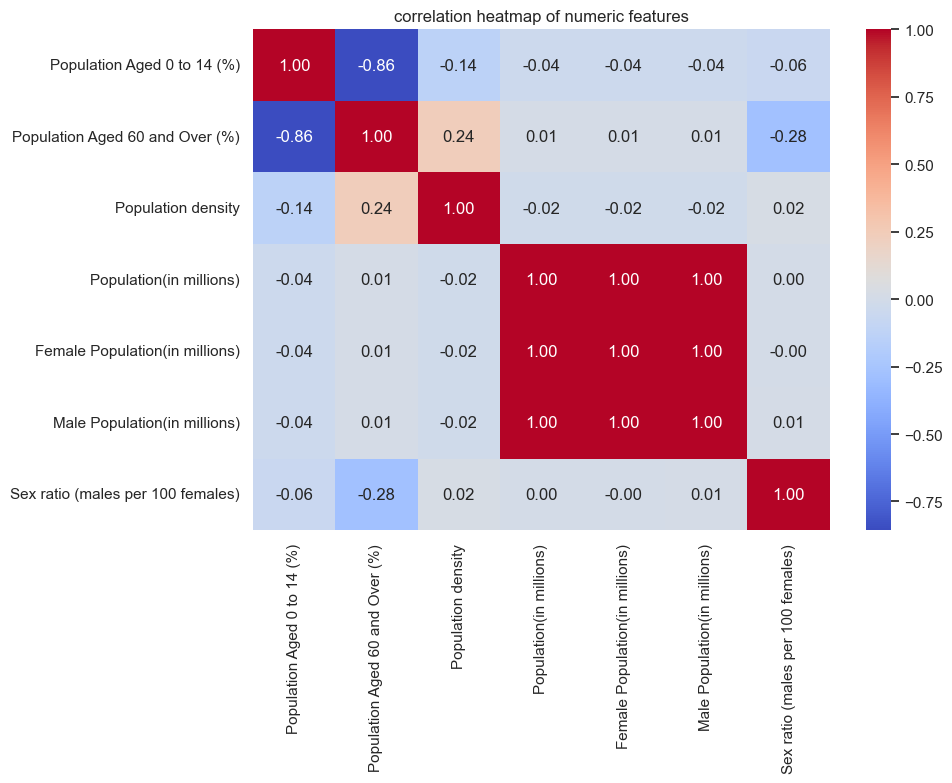

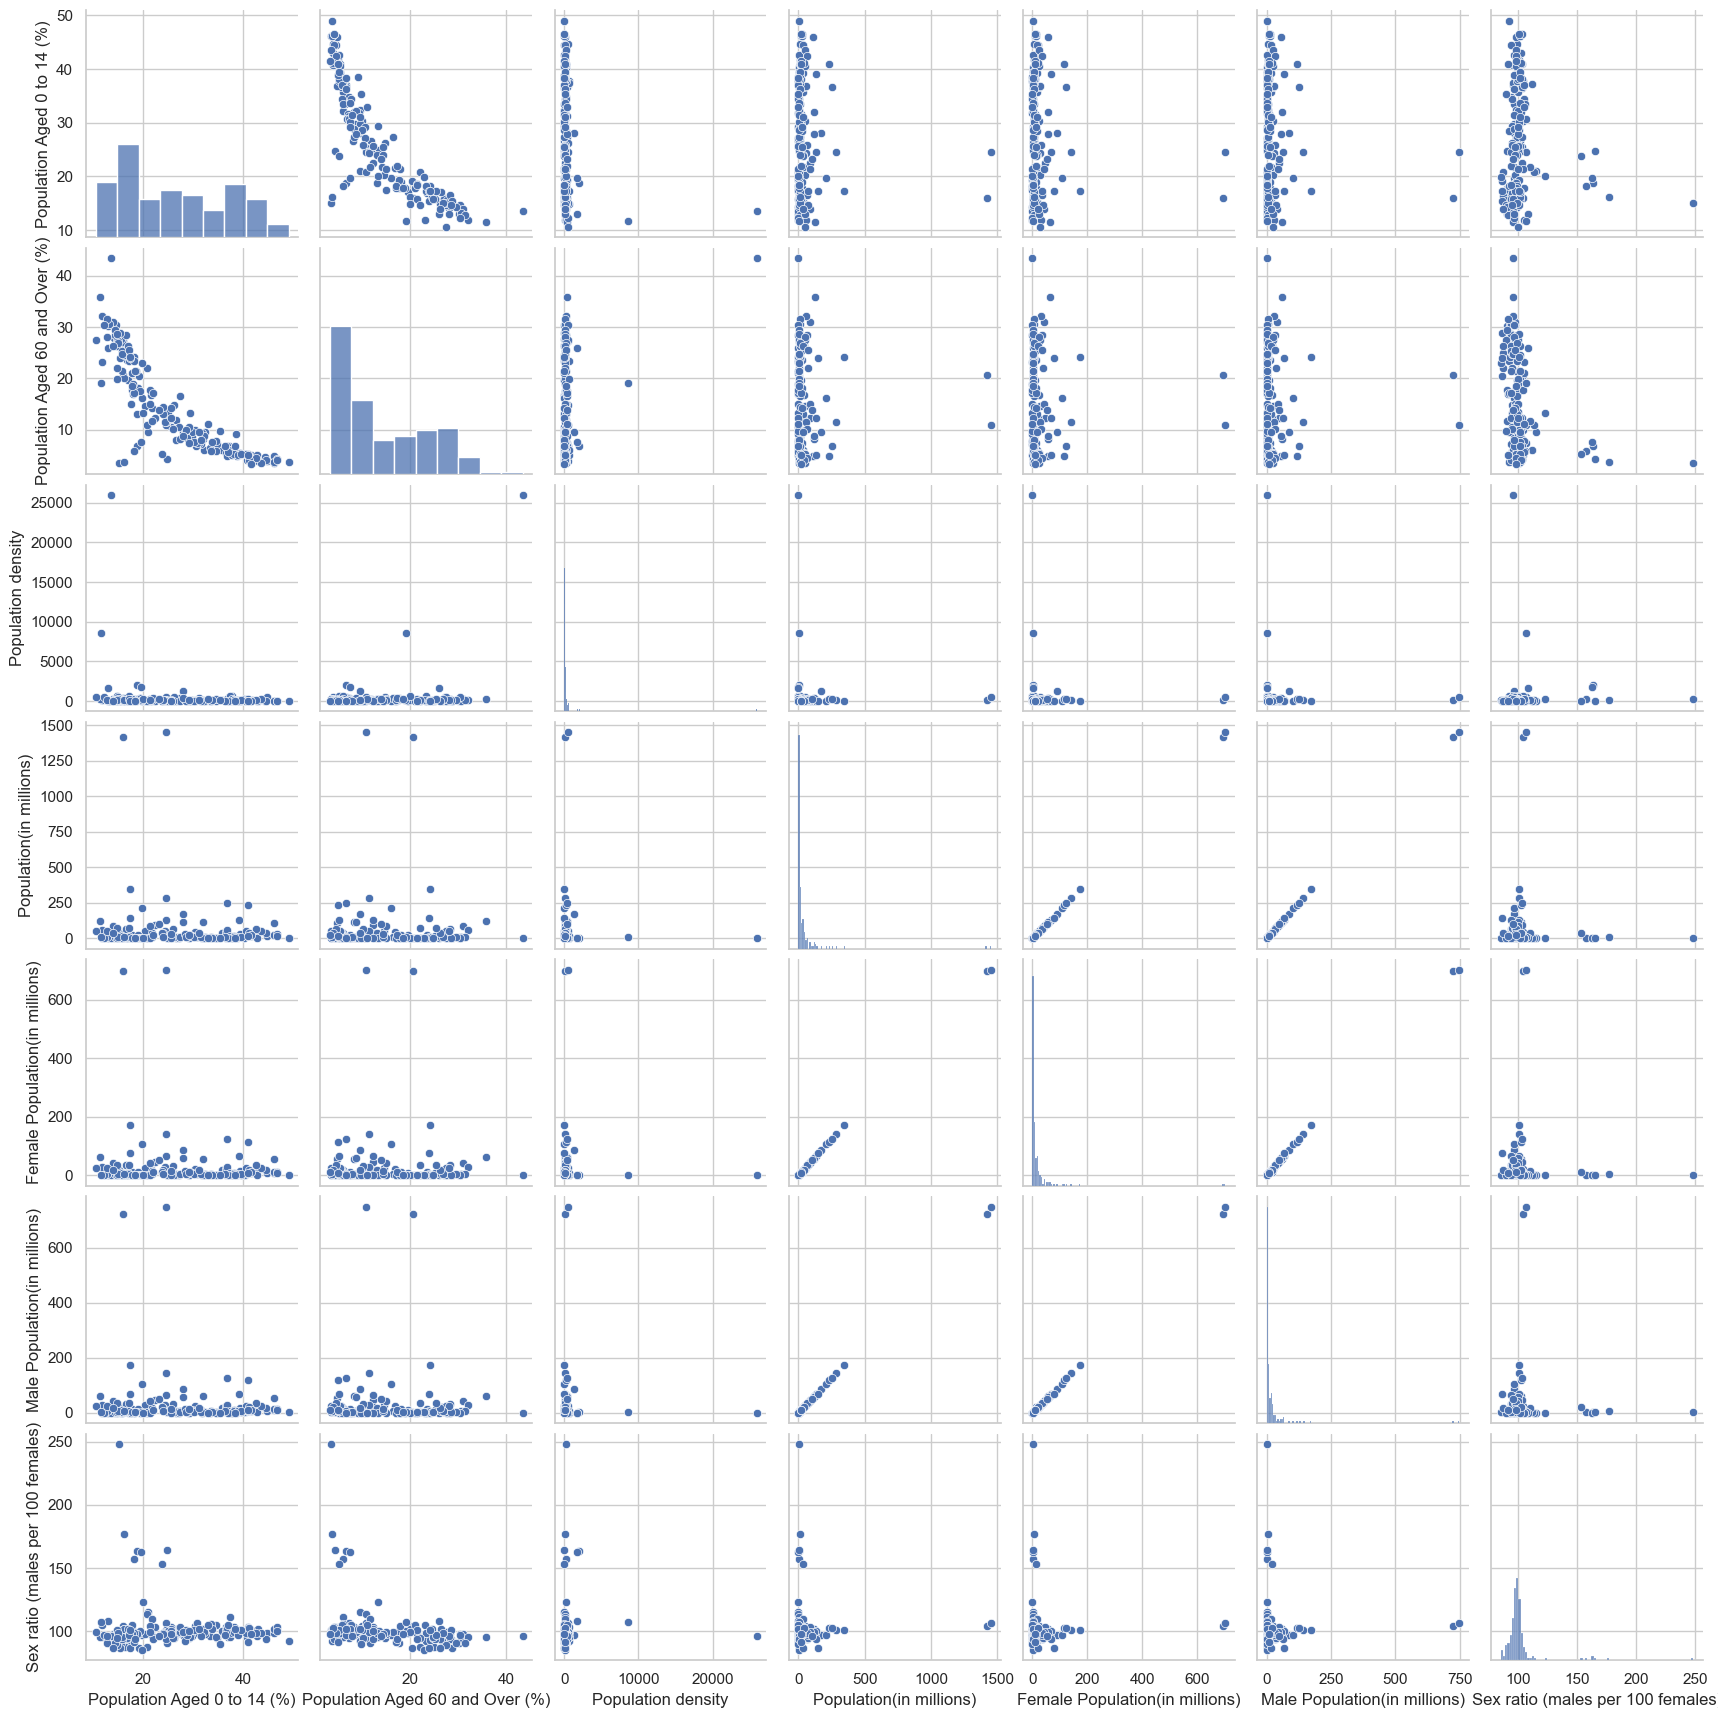

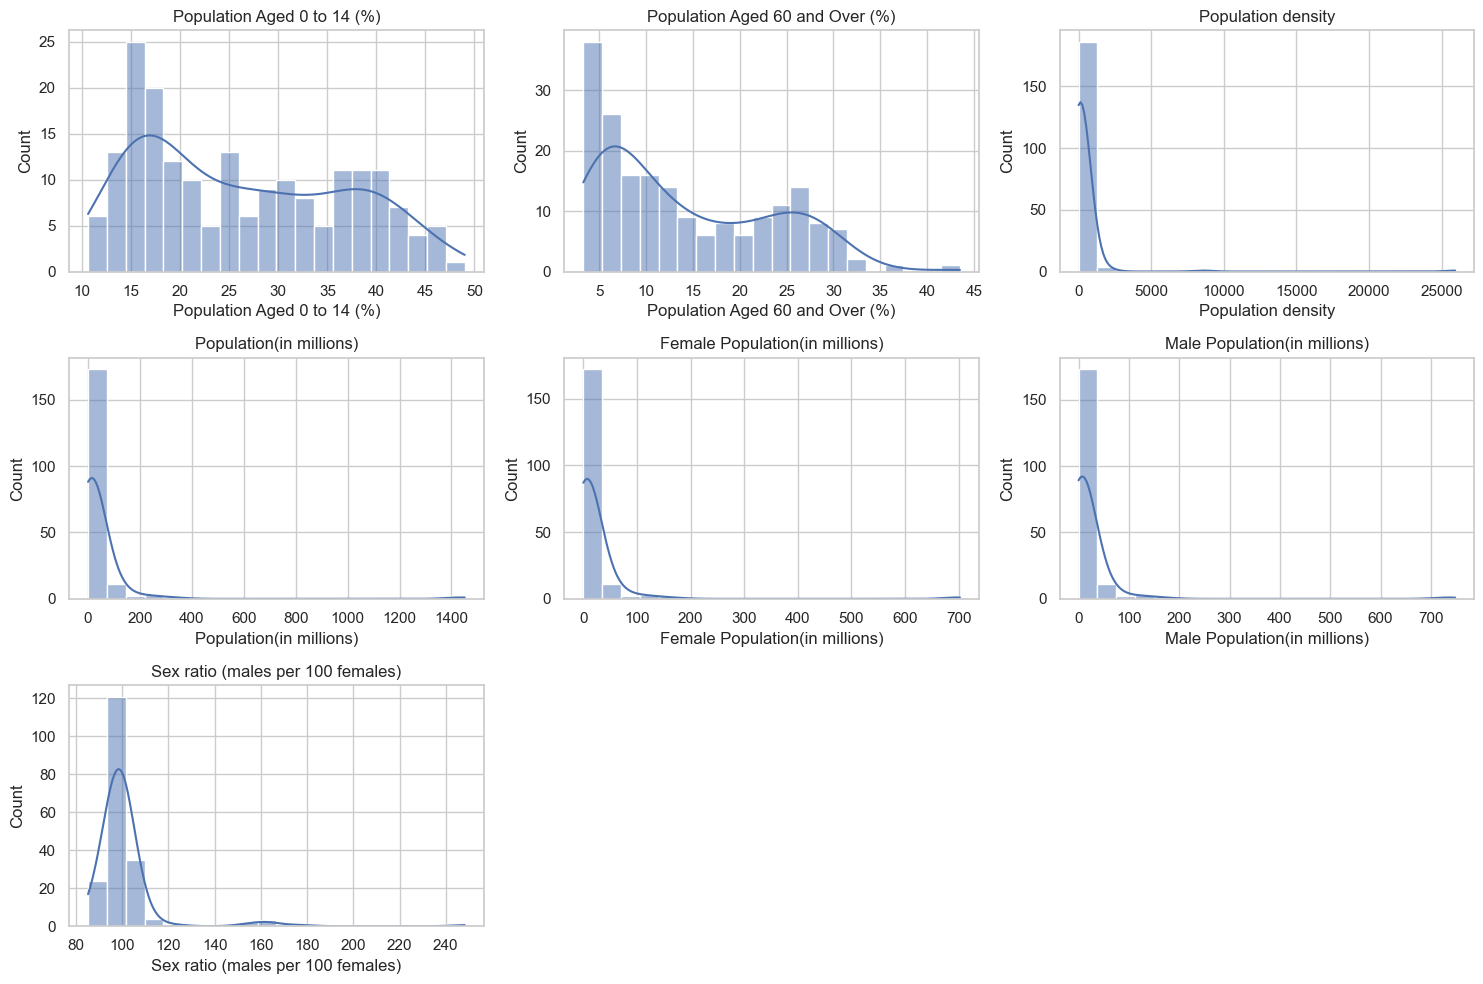

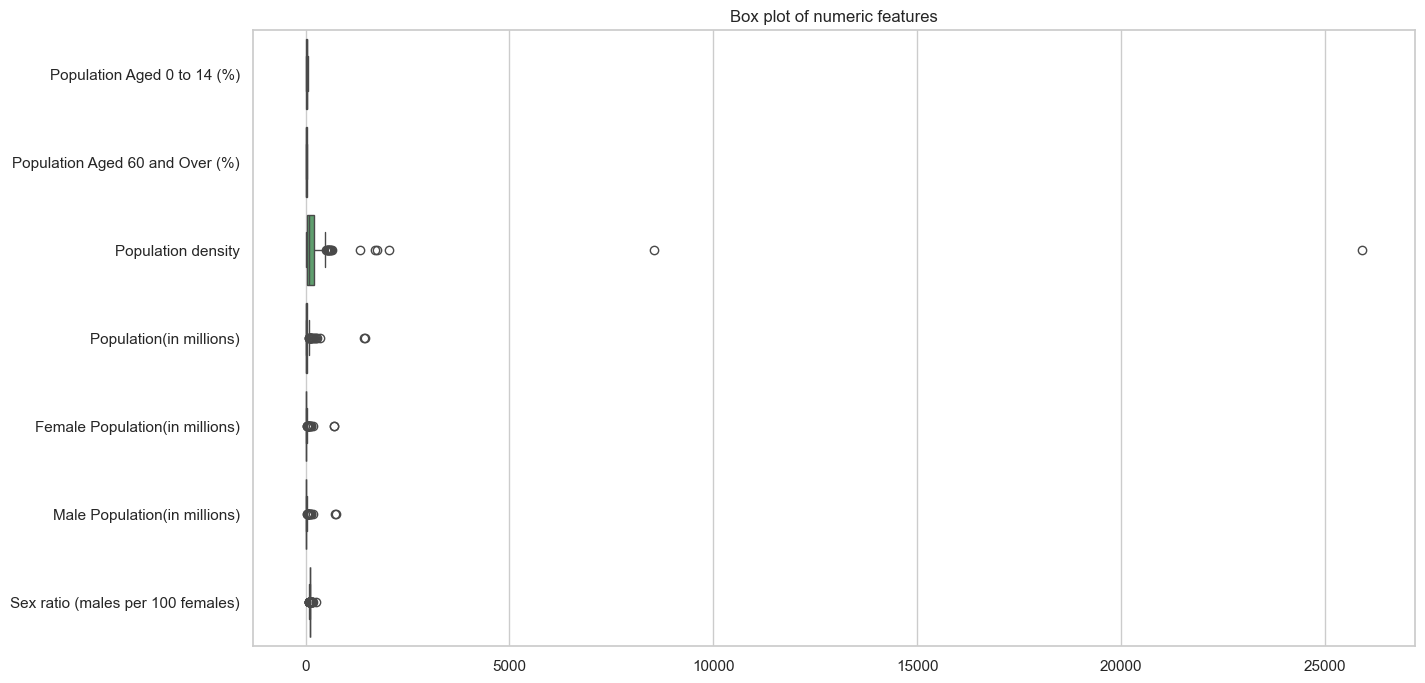

In [5]:
# reduce dataframe to numeric columns for correlation analysis
numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(10,8))
sns.heatmap(numeric_df.corr(),annot=True,cmap='coolwarm',fmt='.2f')
plt.title('correlation heatmap of numeric features')
plt.tight_layout()
plt.show()

#pair plot
sns.pairplot(numeric_df)
plt.show()

#histograms for each numeric column
numeric_columns = numeric_df.columns
plt.figure(figsize=(15,10))
for i, col in enumerate(numeric_columns,1):
    plt.subplot(3,3,i)
    sns.histplot(numeric_df[col],kde=True,bins=20)
    plt.title(col)
    plt.tight_layout()
plt.show()

#box plot to assess distributions and potential outliers
plt.figure(figsize=(15,8))
sns.boxplot(data=numeric_df,orient='h')
plt.title('Box plot of numeric features')
plt.show()

R2 score for predicting population(in millions): -5.3967


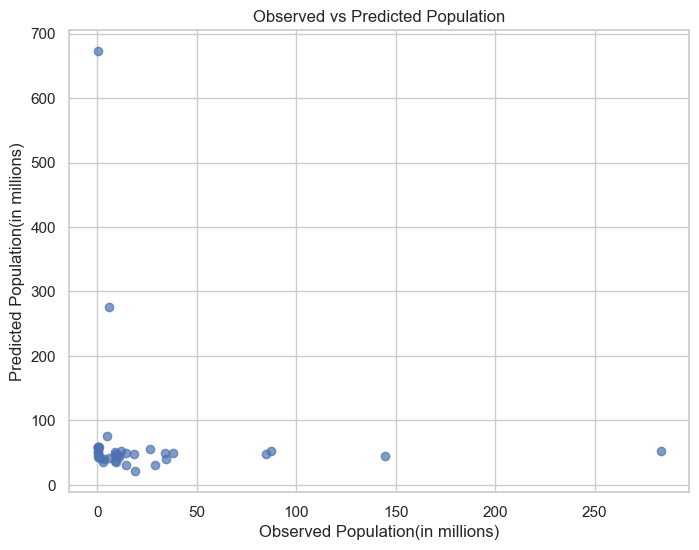

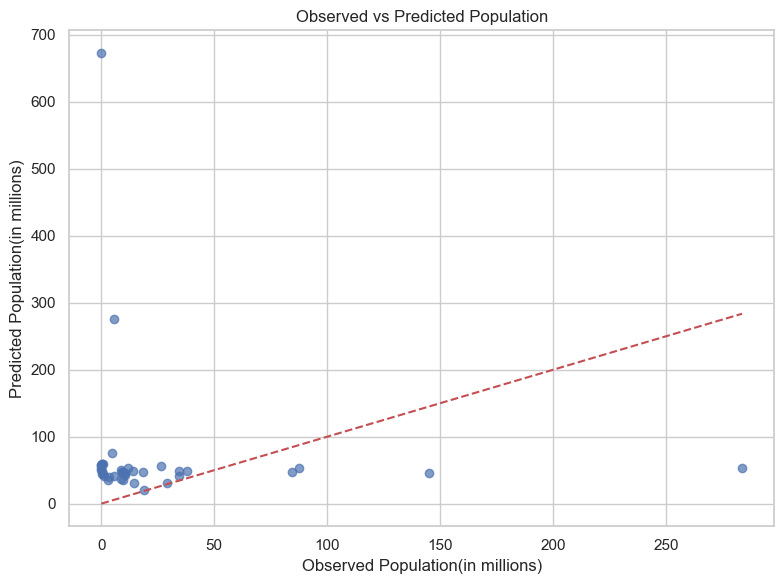

In [9]:
# define features and target for the predictor
features = ['Population Aged 0 to 14 (%)', 'Population Aged 60 and Over (%)', 'Population density']
target = 'Population(in millions)'
x = df[features]
y=df[target]

#split the data into training and testing sets
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
#create and train the linear regression model
model = LinearRegression()
model.fit(x_train,y_train)
#make predictions on the test set
y_pred = model.predict(x_test)
#calculate the R2 score as the accuracy metric
score = r2_score(y_test,y_pred)
print(f'R2 score for predicting population(in millions): {score:.4f}')
#plotting observed vs predicted values
plt.figure(figsize=(8,6))
plt.scatter(y_test,y_pred,alpha=0.7)
plt.xlabel('Observed Population(in millions)')
plt.ylabel('Predicted Population(in millions)')
plt.title('Observed vs Predicted Population')
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],'r--')
plt.tight_layout()
plt.show()